# Data viz

To run python script, after you navigate to this directory in the terminal, run

`python polymerApp.py`

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import sem

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [7]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import numpy as np


def read_in_file(fname):
    # Initialize the lists to store the counts for each row
    count_lists = []

    # Open the CSV file for reading
    with open(fname, 'r') as file:
        reader = csv.reader(file)

        # Loop through each row in the CSV file
        for i, row in enumerate(reader):
            # Skip every second row
            if i % 2 != 0:
                continue

            # Count how many times each number appears in the row
            counts = [row.count(str(n)) for n in range(1, 4)]

            # Add the counts for this row to the list of count lists
            count_lists.append(counts)

    # Transpose the list of count lists to get a list of counts for each number
    counts = [[row[i] for row in count_lists] for i in range(3)]

    # Create a new list of lists by pairing up the x entry of each list
    paired_list = list(zip(*counts))

    # Create a Pandas DataFrame for the paired points
    df = pd.DataFrame(paired_list, columns=['Count of 1', 'Count of 2', 'Count of 3'])


    # Remove columns with zero variance
    df = df.loc[:, df.var() != 0]
    
    name = fname.replace('.csv', '')
    
    return name, df


# get all datafiles
import os
data_files = [f'Data/{f}' for f in os.listdir(f'{os.getcwd()}/Data/') if str(f).endswith('.csv')]
DFs = {}
for fname in data_files:
    name, df = read_in_file(fname)
    name = name.replace('Data/', '')
    DFs[name] = df

DFs.keys()

dict_keys(['8kDa', '4kDa', '8kDaDisp1point6', '2kDa', '12kDa', '20kDa', '16kDa'])

In [9]:
def make_first_plot(name, df):
    # Create the joint plot
    sns.set_style('white')
    sns.set(font_scale=1.5)
    g = sns.jointplot(x='Count of 1', y='Count of 2', 
                      data=df, kind='kde', cmap='Reds', fill=True)

    #R2
    R2 = r2_score(df['Count of 2'], 23/77*df['Count of 1'])
    print(f'R^2: {R2}')
    plt.annotate('$R^2 = $' + f'{R2:.4f}', xy=(0.04, 0.9), xycoords='axes fraction')

    # standard error
    SEM = sem(df['Count of 2'])
    print(f'Std Error of Mean: {SEM}')

    # mean squared error
    MSE = mean_squared_error(df['Count of 2'], 23/77*df['Count of 1'])
    print(f'MSE: {MSE}')

    # Set labels
    g.set_axis_labels('Count of Morph', 'Count of Nipam', fontsize=16)

    # Set title
    g.fig.suptitle(f'2D Density Plot with Marginal Distributions ({name})', 
                   fontsize=20, y=1.01)

    x1, x2 = g.ax_joint.get_xlim()
    xrange = x2 - x1
    y1, y2 = g.ax_joint.get_ylim()
    yrange = y2 - y1
    g.ax_joint.set_xlim(x1 , x1 + xrange * 0.75)
    g.ax_joint.set_ylim(y1 , y1 + yrange * 0.75)

    # add line
    x = df['Count of 1']
    x = np.array([val for val in x if val < (x1 + xrange * 0.65) ])
    ypred = 23/77 * x
    sns.lineplot(x=x, y=ypred, color='gray')
    
    #plt.show()
    plt.savefig(f'Figures/{name}_plot1.svg', format='svg', bbox_inches='tight')
    
    return R2

R^2: 0.47710891354026164
Std Error of Mean: 0.04346506146852594
MSE: 24.695309387755106
R^2: 0.1804733679393422
Std Error of Mean: 0.01722626874534058
MSE: 12.159251077753416
R^2: 0.8585522151479814
Std Error of Mean: 0.08797697424849253
MSE: 27.36886768089054
R^2: -0.12732313687422403
Std Error of Mean: 0.007275364548206026
MSE: 5.966966456400741
R^2: 0.6431712289082965
Std Error of Mean: 0.07959127179160658
MSE: 37.670039100433975
R^2: 0.8325746347130234
Std Error of Mean: 0.20021595501573866
MSE: 67.10813810086017
R^2: 0.7968483693573115
Std Error of Mean: 0.14558898753773716
MSE: 53.82110777534153


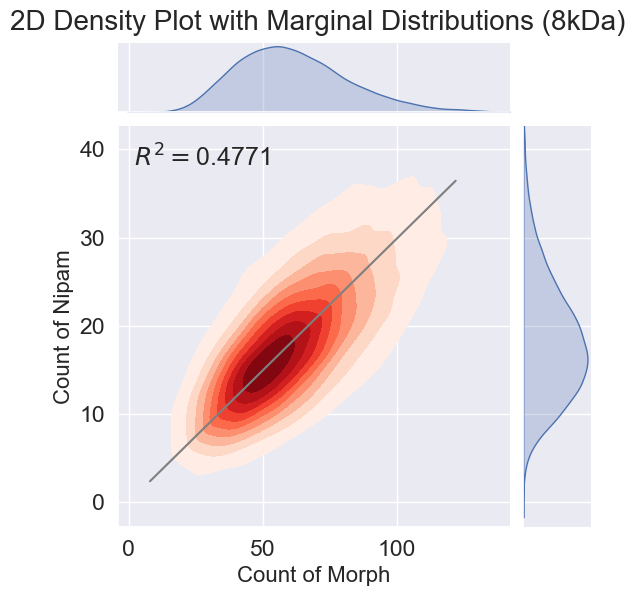

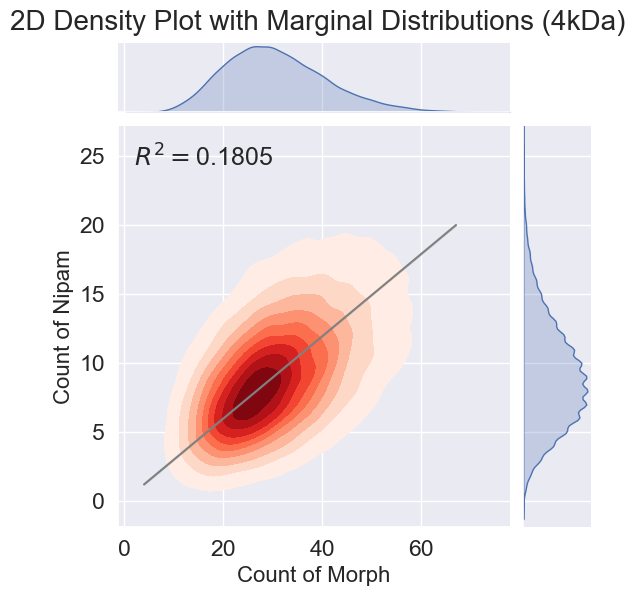

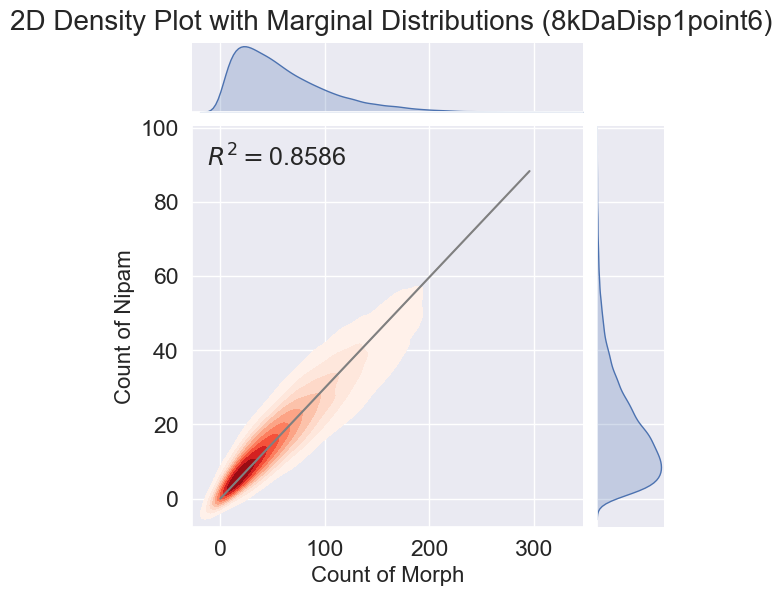

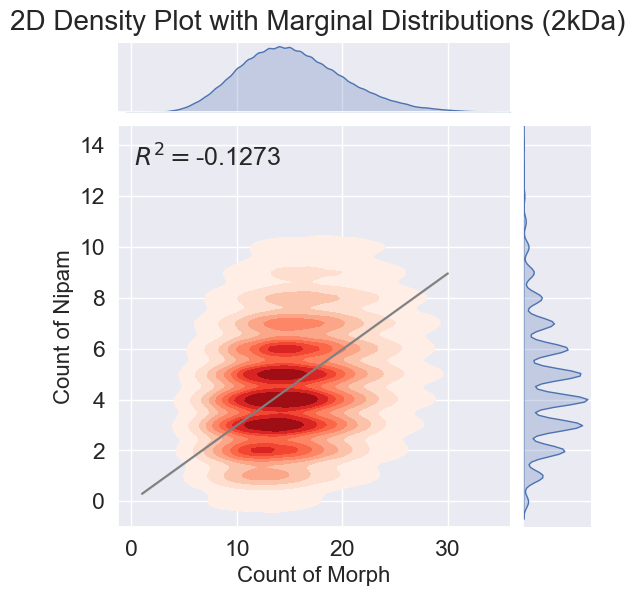

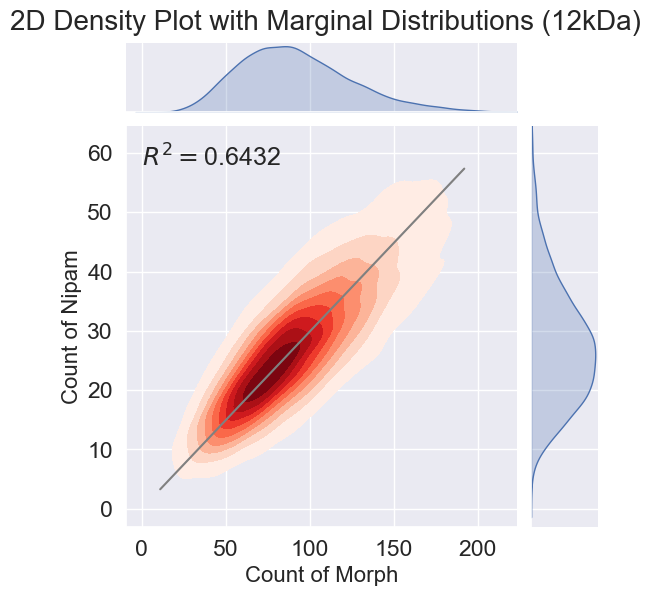

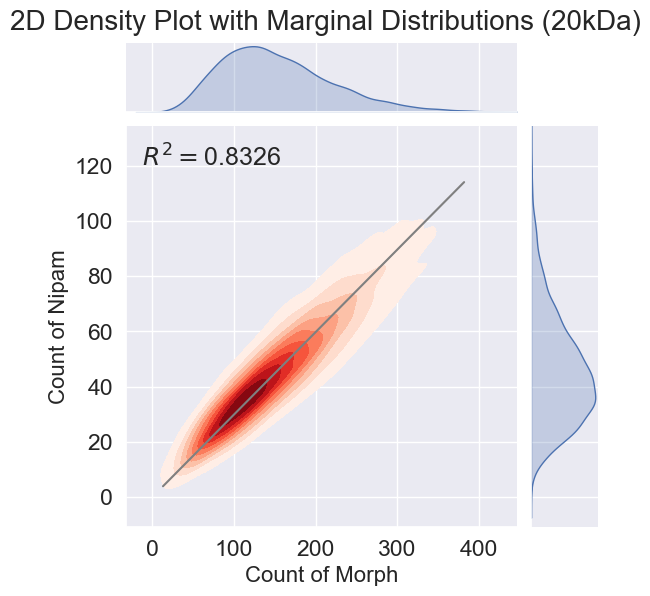

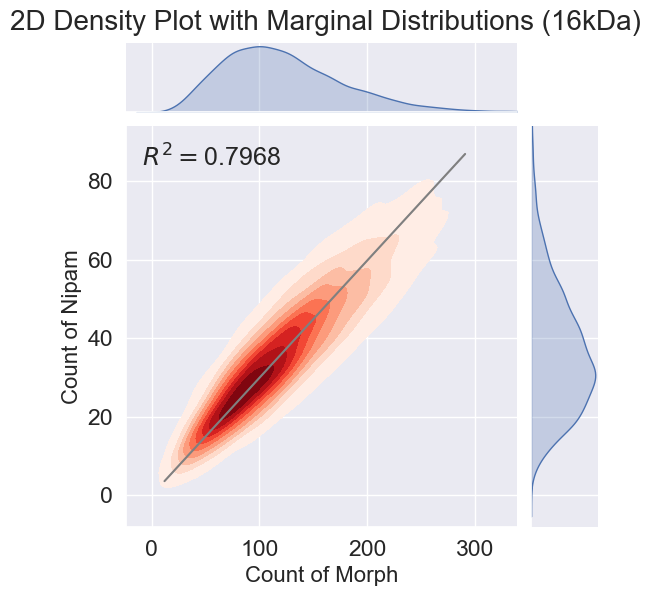

In [10]:
R2_vals = {}
for name, df in DFs.items():
    R2 = make_first_plot(name, df)
    R2_vals[name] = R2  

In [11]:
R2_vals

{'8kDa': 0.47710891354026164,
 '4kDa': 0.1804733679393422,
 '8kDaDisp1point6': 0.8585522151479814,
 '2kDa': -0.12732313687422403,
 '12kDa': 0.6431712289082965,
 '20kDa': 0.8325746347130234,
 '16kDa': 0.7968483693573115}